<a href="https://colab.research.google.com/github/ohhongseok/ML-DeepLearning/blob/main/5/5-2/%EA%B5%90%EC%B0%A8%EA%B2%80%EC%A6%9D%EA%B3%BC_%EA%B7%B8%EB%A6%AC%EB%93%9C_%EC%84%9C%EC%B9%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 이번장 핵심 키워드
 - 검증세트
 - 교차검증
 - 그리드 서치
 - 랜덤 서치


# 검증 데이터
> 앞선 장에서는 훈련세트에서 모델을 훈련하고 테스트 세트에서 모델을 평가 하였음. 그리고 테스트 세트에 맞추어 모델을 수정해 나갔고, 이는 결국 테스트 세트에 맞추어진 모델이 만들어 지는것임.<br>
하지만, 테스트 세트는 최대한 사용하지 않는것이 중요하며 테스트 세트로 성능을
올바르게 예측하려면 <br> ***모델을 만들고 마지막에 딱 한번 ***사용하는것이 중요함

# Point 
 - 테스트 세트를 사용하지 않으면서 모델이 과대적합인지 과소적합인지 판단해야 함
 - 따라서 데이터를 총 3개로 나누어 사용
  > 훈련세트 : 모델 훈련용 데이터<br>
  ***검증세트*** : 과대 / 과소적합을 판단하기 위한 데이터(우리가 앞서 했던 테스트 데이터의 역할을 함)<br>
  테스트 세트 -> : 테스트, 검증데이터로 확인 후 마지막에 모델 일반화를 검증하기 위한 데이터
 - 일반적으로는 데이터를 훈련세트 0.6, 검증세트 0.2 테스트세트 0.2로 두어 모델을 훈련 및 테스트 한다.

In [12]:
# 데이터 일기 및 넘파이 배열로 저장
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')


data = wine[['alcohol','sugar','pH']].to_numpy()
target = wine['class'].to_numpy()

wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [15]:
from sklearn.model_selection import train_test_split
# 데이터 나누기 
# 훈련 / 테스트 / 검증 데이터로

# 1. 80 : 20으로 데이터 나누기
train_input,test_input,train_target,test_target = train_test_split(data,target,test_size=0.2,random_state=42)

In [16]:
# 2. 훈련 데이터(train_input / _target) 내에서 훈련데이터와 테스트 데이터 나누기
sub_input,val_input,sub_target,val_target = train_test_split(train_input,train_target,test_size=0.2,random_state=42) 

In [18]:
print("훈련 데이터 :",sub_input.shape)
print("테스트 데이터 :",test_input.shape)
print("검증 데이터 :",val_input.shape)

# 나뉜 데이터 확인

훈련 데이터 : (4157, 3)
테스트 데이터 : (1300, 3)
검증 데이터 : (1040, 3)


In [23]:
# 모델 제작 후 평가 진행
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(sub_input,sub_target) # 데이터 학습

# 훈련 및 테스트 데이터로 score 확인
# 검증데이터는 앞서 진행한 테스트 데이터의 작업을 이어받아 진행함
print(dt.score(sub_input,sub_target)) # 훈련 데이터
print(dt.score(val_input,val_target))   # 검증 데이터

# 이제부터는 검증데이터로 과대 및 과소적합을 검증

0.9971133028626413
0.864423076923077


# 교차검증

 - 일반적으로 많은 데이터로 훈련을 시킬수록 좋은 모델이 만들어진다.
 - 이와 동시에 검증세트를 너무 조금 떼어 놓으면 검증 점수가 들쭉날쭉하고 불안정함
 - 따라서 ***교차검증***을 활용하여 안정적인 검증 점수를 얻고 훈련에 더 많은 데이터를 사용 할 수 있음
  > - 기존방식<br>
  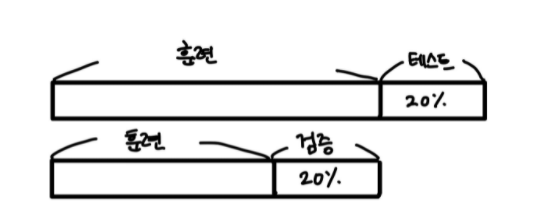
- k-폴드 교차검증<br>
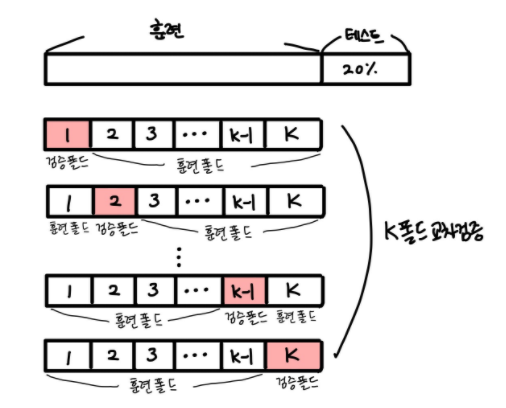
- 테스트와 훈련 데이터를 나눈 훈련세트 내에서 K개의 데이터 덩어리를 만든 후<br> k 번째 데이터([1:k])를 검증데이터로, k번째 데이터를 제외한 나머지 데이터를 훈련데이터로 구성 한 후 <br>k번 반복해 평가하는 과정 
- 이를 활용하여 안정적인 검증 점수를 얻고 훈련에 더 많은 데이터를 사용할 수 있음 -> 데이터가 적을 경우 사용
 - 여기에선 사이킷런 내에 있는 `cross_validate()` 라는 교차검증 함수를 사용

In [26]:
from sklearn.model_selection import cross_validate
# 교차검증 함수 사용
# 평가할 모델 dt를 넣고, 훈련세트 데이터를 통째로 넣음
# 기본적으로 5개의 교차검증 과정을 거침(default=5, 폴드수 변경 가능 예시). cv=3으로 3번의 폴드 과정 진행)
score = cross_validate(dt,train_input,train_target)
print(score)

{'fit_time': array([0.01007509, 0.00648665, 0.00689983, 0.00669718, 0.00640702]), 'score_time': array([0.00092125, 0.00074768, 0.0007813 , 0.00080323, 0.00073028]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}


In [27]:
# 교차 검증의 최종 점수
import numpy as np
print(np.mean(score['test_score'])) # 폴드 시 얻을 수 있는 검증폴드 점수 평균

0.855300214703487


# 교차 검증 시 주의해야 할 점
 - `cross_validate()` 함수는 훈련세트를 섞어서 폴드를 나누지 않는다.(섞지 않으면 샘플의 편향이 일어나 제대로 측정되지 않을 수 있음)
 - test_train_split()의 경우 random_state의 하이퍼라미터 지정을 통해 따로 섞을 필요가 없었지만, 교차검증을 진행 할 경우 훈련세트를 섞을 ***분할기(splitter)*** 를 사용해야 한다.
  > 회귀일 경우 KFold 분할기 사용<br>
  분류 모델일 경우 StratifiedKFold 분할기 사용, 예제에서는 분류 데이터이기 때문에 StratifiedKFold 사용

In [33]:
from sklearn.model_selection import StratifiedKFold
# 매개변수로, StratifiedKFold()를 전해줌
score = cross_validate(dt,train_input,train_target,cv=StratifiedKFold())
print(np.mean(score['test_score']))
# 지금 나온 출력결과는 위의 검증과정과 동일함

0.855300214703487


In [35]:
# 훈련세트를 섞은 후 10개의 폴드 검증을 한다면 아래와 같이 작성됨
splitter = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
score = cross_validate(dt,train_input,train_target,cv=splitter)
print(np.mean(score['test_score']))
# 이전 두개의 예제와 다르게 정확도가 좀 더 올라감

0.8574181117533719
